In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("text_emotion.csv")
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [3]:
df.shape

(40000, 4)

In [4]:
df.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['tweet_length_words'] = df['content'].apply(lambda x: len(x.split()))
df['tweet_length_characters'] = df['content'].apply(len)
df.head()

,tweet_id,sentiment,author,content,tweet_length_words,tweet_length_characters
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,18,92
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,10,60
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,3,35
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,7,36
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,15,86


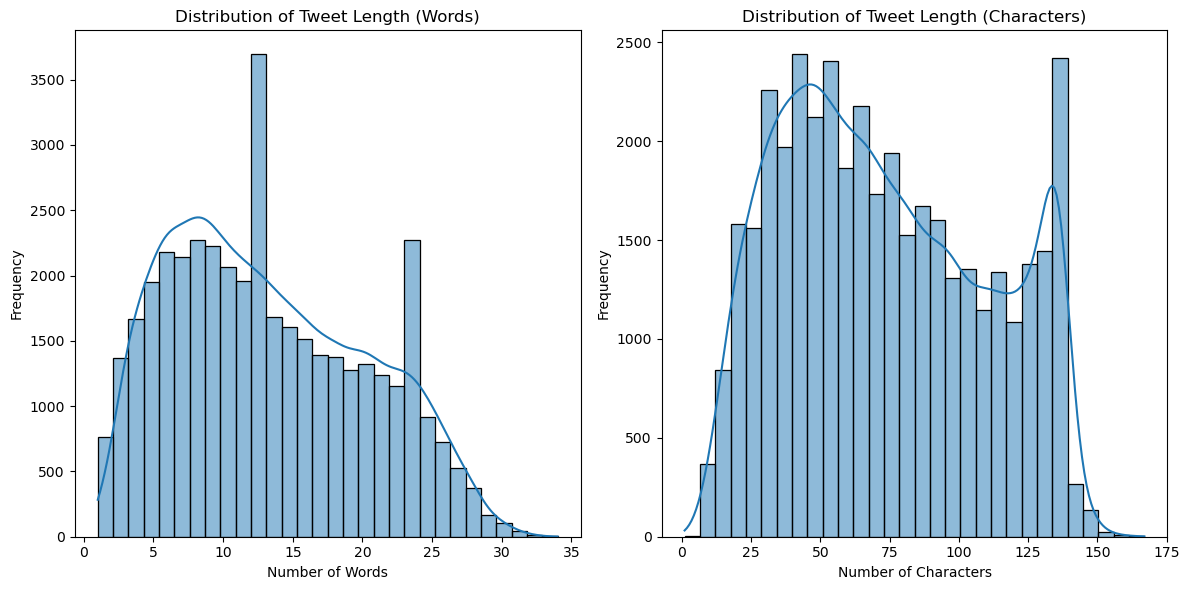

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['tweet_length_words'], bins=30, kde=True)
plt.title('Distribution of Tweet Length (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(df['tweet_length_characters'], bins=30, kde=True)
plt.title('Distribution of Tweet Length (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

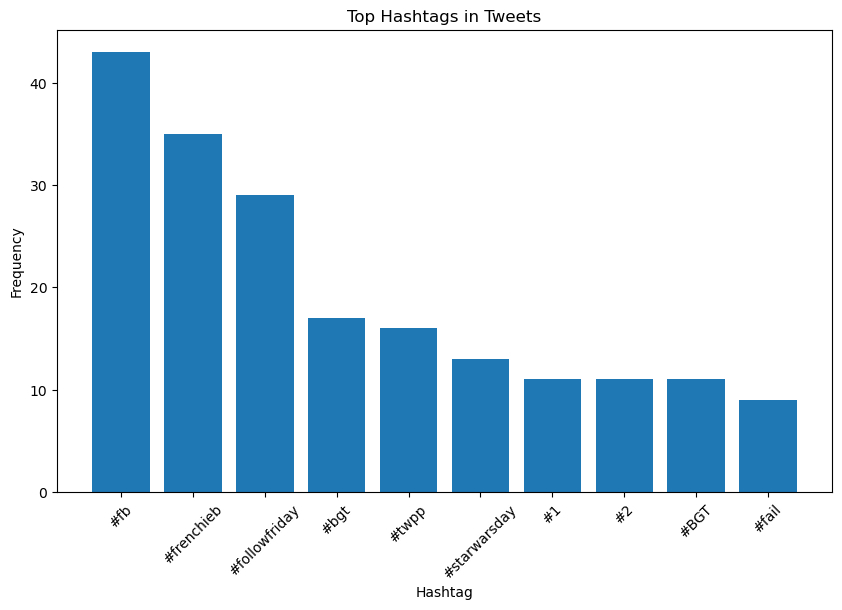

In [12]:
# Hashtag Analysis
import re
from collections import Counter
tweets = ' '.join(df['content'])
hashtags = re.findall(r'#\w+', tweets)
hashtag_counts = Counter(hashtags)
top_hashtags = hashtag_counts.most_common(10) 
plt.figure(figsize=(10, 6))
plt.bar([tag[0] for tag in top_hashtags], [tag[1] for tag in top_hashtags])
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.title('Top Hashtags in Tweets')
plt.xticks(rotation=45)
plt.show()

In [13]:
import string
from nltk.corpus import stopwords
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()    
    text = ''.join([char for char in text if char not in string.punctuation])
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
df['cleaned_content'] = df['content'].apply(preprocess_text)
df.head()

,tweet_id,sentiment,author,content,tweet_length_words,tweet_length_characters,cleaned_content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,18,92,tiffanylue know listenin bad habit earlier sta...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,10,60,layin n bed headache ughhhhwaitin call
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,3,35,funeral ceremonygloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,7,36,wants hang friends soon
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,15,86,dannycastillo want trade someone houston ticke...


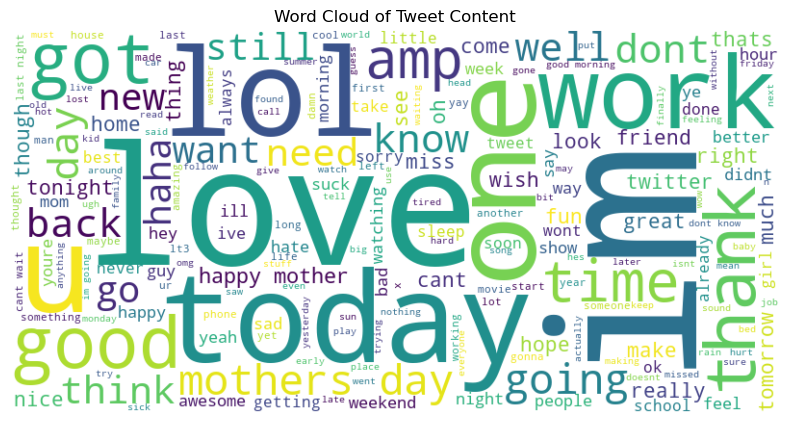

In [14]:
from wordcloud import WordCloud
all_tweets = ' '.join(df['cleaned_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Tweet Content")
plt.show()

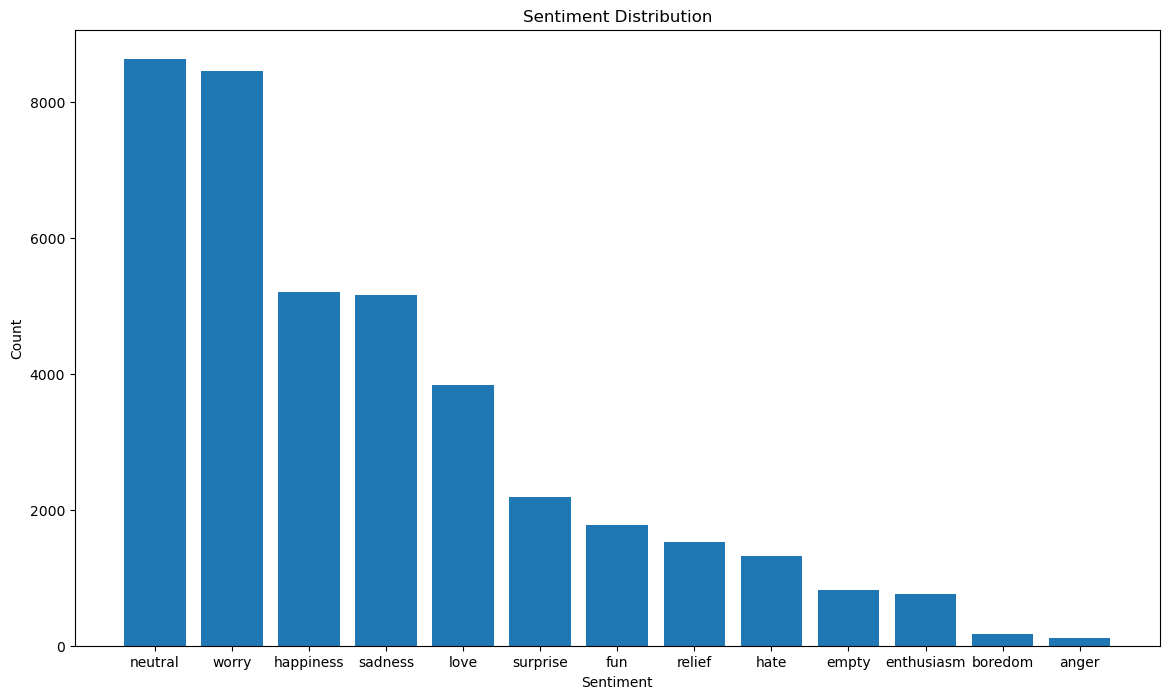

In [15]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(14, 8))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [16]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_predicted'] = df['content'].apply(classify_sentiment)

print(df[['tweet_id', 'sentiment_predicted']])

df.to_csv('sentiment_predicted_data.csv', index=False)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


         tweet_id sentiment_predicted
0      1956967341            negative
1      1956967666             neutral
2      1956967696            negative
3      1956967789            positive
4      1956968416            negative
...           ...                 ...
39995  1753918954             neutral
39996  1753919001            positive
39997  1753919005            positive
39998  1753919043            positive
39999  1753919049             neutral

[40000 rows x 2 columns]
